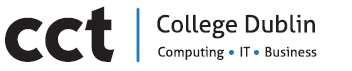


|                ||                       | 
|----------------||-----------------------|
|Module Title(s):||Machine Learning for AI| 
|Assement Title:||ML_CA1| 
|Lecture (s) Name:||David MCQuaid|
|Student Name:||Eliabe Baliero de Moura|
|Student Number:||2022474|
|Issue Date:||25 March 2024|
|Assessment Due Date:||22 April 2024|
|Date of Submission:||22 April 2024|


# Table of Contents

- [Introduction](#Introduction) 2
- [Data Analysis](#Data-Analysis) 3

     - [](#) 
     - [Cleaning Dataset](#Cleaning-Dataset) 4
     - [Checking duplicated rows](#Checking-duplicated-rows) 4.1
     - [Droping duplicated rows](#Droping-duplicated-rows) 4.2 
     - [Convert Strings to lower case](#Convert-Strings-to-lower-case) 4.3
     - [Remove extra white spaces](#Remove-extra-whit-spaces) 4.4
     - [Checking any null](#Checking-any-null) 4.5
     - [Indentify-Outliers](#Indentify-Outliers) 4.6
     - [Histogram](#Histogram) 4.7
     - [Indentify Columns Outliers](#) 4.8
     - [Eliminate Outliars](#) 4.9
     - [](#) 
- [Machine Learning](#Machine-Learning) 5
- [Labeled and Unlabeled Data](#Labeled-and-Unlabeled-Data) 6   
     - [Model](#Model) 7
     - [Create a Validation Dataset](#Create-Dataset) 7.1
     - [Evaluate each model](#) 7.2
     - [Comparing each model](#) 7.3
     - [](#) 
- [Fit RF Model](#Fit-RF-Model) 8 
- [Evaluate predictions](#Evaluate-Predictionsl) 8.1

- [Conclusion](#Conclusion) 9
- [References](#References) 10


# Introduction 

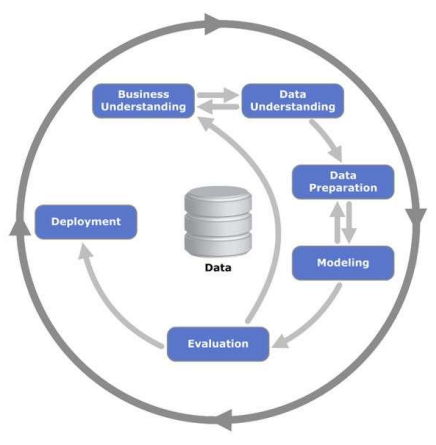

# Data Analysis

In [203]:

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [204]:
df = pd.read_csv("log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [205]:
df.shape

(65532, 12)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [207]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


# Cleaning Dataset 


In [208]:
duplicates = df.duplicated()
print("\nDuplicate Rows:")
print(df[duplicates])


Duplicate Rows:
       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
268          21268             62609                0                     0   
351          48706             23393                0                     0   
593          65003             57470                0                     0   
632            443             49988                0                     0   
661          10669             49756                0                     0   
...            ...               ...              ...                   ...   
65517        54874               445                0                     0   
65519        49784               445                0                     0   
65521        42995             26467                0                     0   
65522        53314             64097                0                     0   
65531        54867               445                0                     0   

       Bytes  Bytes Sent  Bytes Re

4.2 Now we can drop the rows that are duplicated, and as we can see the shap of our data went from (65532, 12) to (57170, 12)

In [209]:
df = df.drop_duplicates()
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
65526,51710,43069,65147,43069,70,70,0,2,8,2,0,allow
65527,63691,80,13237,80,314,192,122,6,15,4,2,allow
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
65529,54871,445,0,0,70,70,0,1,0,1,0,drop


4.3 Convert all string values to lower case

In [210]:
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

4.4 Remove extra white spaces from all string columns

In [211]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

4.5 Checking any null/na in my data

In [212]:
df.isnull().sum()
#df.fillna('')

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

4.6 Indentify Outliers

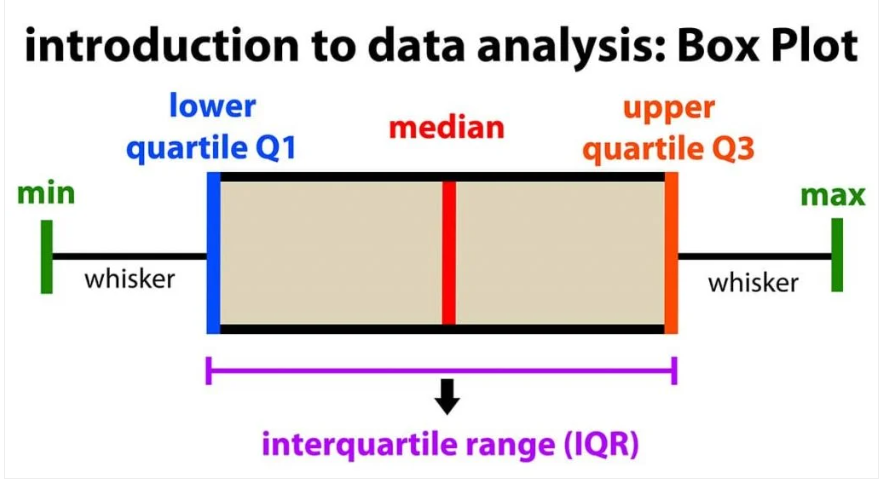

Check boxplot to see outliers 

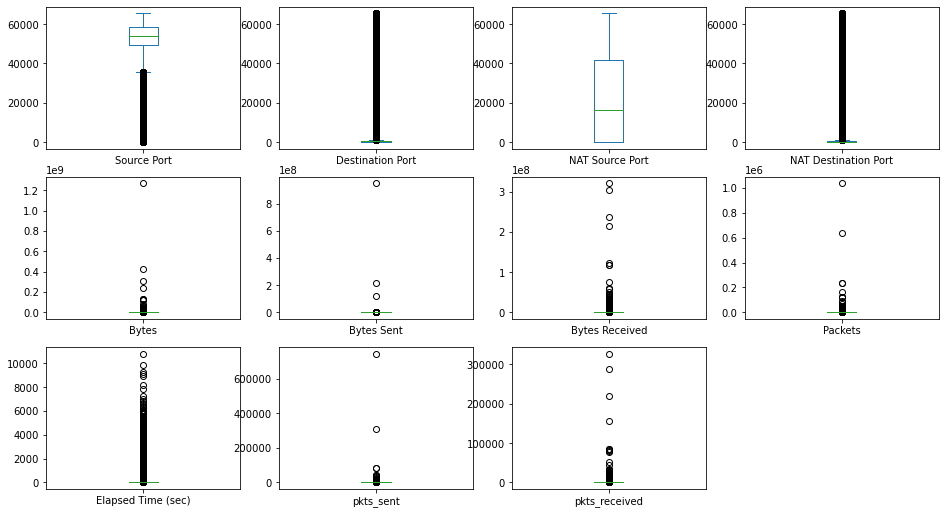

In [213]:
import matplotlib.pyplot as plt
df.groupby('Action').size()
# Plot the box plot with directly specified figure size
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16, 12))

# Show the plot
plt.show()


4.7 Histogram
Histogram of each input variable to see distribution

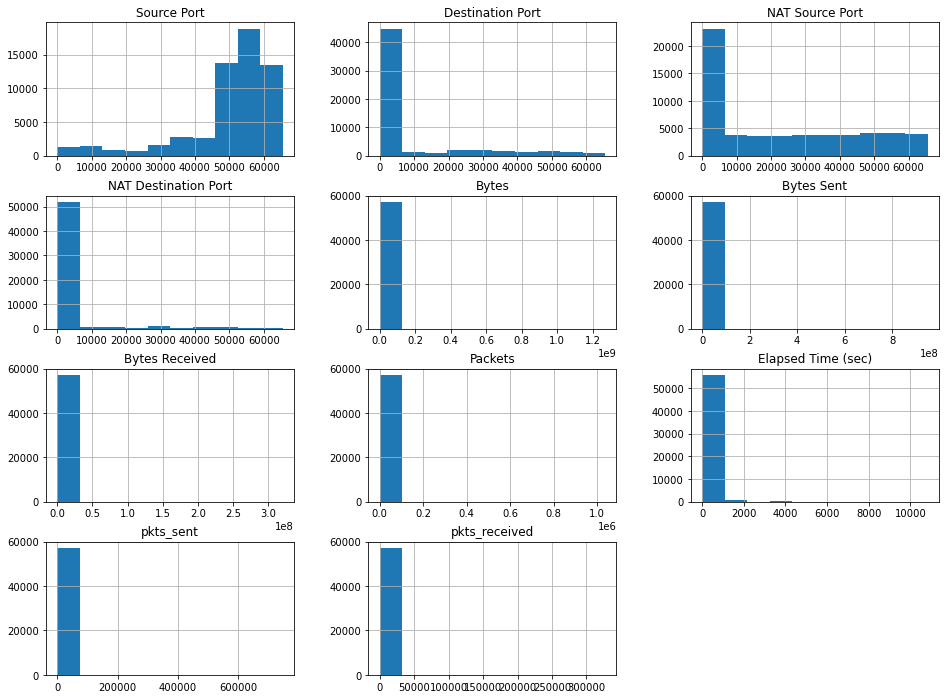

In [214]:
fig, ax = plt.subplots(figsize=(16, 12))  # Adjust the width and height as needed

# Plot the histogram
df.hist(ax=ax)

# Show the plot
plt.show()

4.8 Define columns outliers 
Define the columns you want to check for outliers

In [215]:
# Define the columns you want to check for outliers
columns_to_check = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 
                       'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 
                       'pkts_sent', 'pkts_received']



# Function to identify outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers for each specified column
outliers = df[columns_to_check].apply(detect_outliers)

# Print the number of outliers found in each column
print(outliers.sum())

# Display the rows containing outliers
print(df[outliers.any(axis=1)])




Source Port              6856
Destination Port        13457
NAT Source Port             0
NAT Destination Port     5845
Bytes                   11945
Bytes Sent              11002
Bytes Received          11164
Packets                  7123
Elapsed Time (sec)       7797
pkts_sent                7653
pkts_received            7639
dtype: int64
       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
5            51465               443            39975                   443   
...            ...               ...              ...                   ...   
65518        54013             37965                0                     0   
65523        55142       

4.9 Eliminate Outliers

In [216]:
df_no_outliers = df[~outliers.any(axis=1)]
df_no_outliers

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,ALLOW
10,43676,80,45378,80,696,378,318,12,35,7,5,ALLOW
13,55597,53,45448,53,168,86,82,2,30,1,1,ALLOW
17,50281,53,33175,53,195,102,93,2,30,1,1,ALLOW
18,57222,53,51448,53,177,94,83,2,30,1,1,ALLOW
...,...,...,...,...,...,...,...,...,...,...,...,...
65520,49783,445,0,0,70,70,0,1,0,1,0,DROP
65525,65323,53,33275,53,356,118,238,2,30,1,1,ALLOW
65527,63691,80,13237,80,314,192,122,6,15,4,2,ALLOW
65529,54871,445,0,0,70,70,0,1,0,1,0,DROP


# Machine Learning 

# Labeled and Unlabeled Data

# Model 
RandomForestClassifier x  Logistic Regression

Create a Validation Dataset 7.1

In [217]:
# Convert the "Action" column to categorical data type
df['Action'] = df['Action'].astype('category')

array = df.values
X = array[:,0:11]
y = array[:,11]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

I chose those 3 models to explain  because those brought me better results.
These models offer a balance of interpretability, efficiency, and performance, 
making them valuable choices for prediction tasks. Evaluating their performance 
on your dataset will help identify the best model.







In [226]:
models = []
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))

Evaluate each model 7.2

In [227]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.998010 (0.000598)
LR: 0.980081 (0.002523)
CART: 0.997595 (0.000751)


Comparing each model 7.3

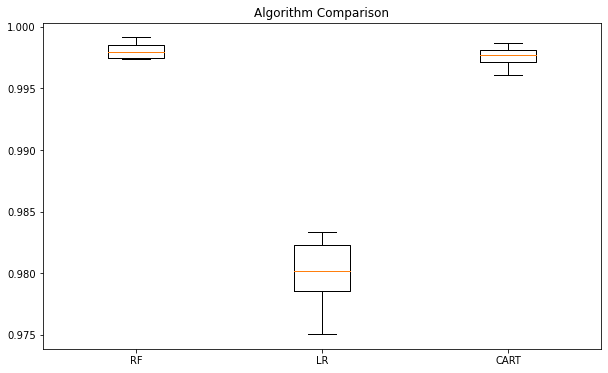

In [228]:
plt.figure(figsize=(10, 6))

# Plot the boxplot
plt.boxplot(results, labels=names)

# Add title
plt.title('Algorithm Comparison')

# Show the plot
plt.show()

So, as we can see RF: 0.998032 (0.000587) RandomForestClassifier has 
the best accuracy, therefore we will chose this one to our final model.

# Fit RF Model

In [229]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)



Evaluate Predictions 8.1

Using Confusion Matrix to compare expected results and accuracy.

In [230]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9978135385691796
[[7510    1    0    0]
 [   0 1615   11    0]
 [   0    8 2281    0]
 [   0    5    0    3]]


In [231]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

       ALLOW       1.00      1.00      1.00      7511
        DENY       0.99      0.99      0.99      1626
        DROP       1.00      1.00      1.00      2289
  RESET-BOTH       1.00      0.38      0.55         8

    accuracy                           1.00     11434
   macro avg       1.00      0.84      0.88     11434
weighted avg       1.00      1.00      1.00     11434



# Conclusion

# References

Saul Mcleod (2023) Box Plot Explained [Online] Available at:     
https://www.simplypsychology.org/boxplots.html                                          
[Accessed 16 April 2024].

Frank Lee (2023) Using Supervised Machine Learning [Online] Available at:     
https://files.eric.ed.gov/fulltext/EJ1403991.pdf                                         
[Accessed 17 April 2024].

